## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



# Parte 1

## Importacion de librerias y conexion con Google Drive

In [2]:
#Importamos las librerias a utilizar

import pandas as pd
import numpy as np

#Generacion de graficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow import keras
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model, save_model

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from itertools import chain

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importacion, EDA y transformacion de datos.

In [3]:
#Importamos el DataFrame autilizar en el modelo de entrenamiento
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modulo 5 /Proyecto 5/WELFake_Dataset.csv/WELFake_Dataset.csv")

In [4]:
#Se revisa su informacion general y completitud y duplicados
print("\n", df1.info())
print("\nLos valores de completitud en % de las columnas son:\n\n", str((df1.notnull().sum()/df1.shape[0])*100))
print("\nLa cantidad de filas duplicadas son:", str((df1.duplicated().sum())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB

 None

Los valores de completitud en % de las columnas son:

 Unnamed: 0    100.000000
title          99.226440
text           99.945934
label         100.000000
dtype: float64

La cantidad de filas duplicadas son: 0


In [5]:
df1

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


En este caso tenemos noticias con su titulo y su etiqueta, en este caso las etiquetas en la columna label son binarias, siendo 1 una noticia real y 0 una noticia falsa, para el modelo usaremos el texto de las noticias por lo que se eliminar todas las demas columnas con informacion que no se usaran

In [6]:
df1["text"][32]

'The left believes these are all perfectly acceptable topics to discuss with our young children. Whatever you do, just don t mention God!A public hearing is taking place Wednesday morning in the Massachusetts State House to look into a controversial sex survey given to middle school and high school students.Developed by the Centers for Disease Control and called the  Youth Risk Behavior Survey,  the survey asks students as young as 12 a series of very personal and highly ideological questions.The survey asks students if they are homosexual and if they are transgender. It also asks if they have had oral or anal sex and if they have performed such acts with up to six people.Whether or not they have carried a gun, smoked cigarettes, consumed alcohol and how much also appear on the questionnaire, as well as whether they have taken drugs, such as OxyContin, Percocet, and Vicodin. It asks how often their guardian uses a seat belt, if the youngster has a sexually transmitted disease, and wher

In [7]:
df1["label"][32]

1

In [8]:
#Se eliminaran los nulos, la variable Unnamed : 0 y la variable title que no entrega informacion util y las filas con duplicados
df1.dropna(inplace=True)
df1.drop(columns = ["Unnamed: 0", "title"],inplace=True)
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True, inplace=True)

In [9]:
#Se revisa su informacion general, completitud y duplicados nuevamente
print("\n", df1.info())
print("\nLos valores de completitud en % de las columnas son:\n\n", str((df1.notnull().sum()/df1.shape[0])*100))
print("\nLa cantidad de filas duplicadas son:", str((df1.duplicated().sum())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62201 entries, 0 to 62200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    62201 non-null  object
 1   label   62201 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 972.0+ KB

 None

Los valores de completitud en % de las columnas son:

 text     100.0
label    100.0
dtype: float64

La cantidad de filas duplicadas son: 0


In [10]:
df1[df1["label"] == 0]

,text,label
2,A dozen politically active pastors came here f...,0
10,BRUSSELS (Reuters) - British Prime Minister Th...,0
11,"WASHINGTON (Reuters) - Charles Schumer, the to...",0
13,As more and more sports fans turn off ESPN to ...,0
14,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0
...,...,...
62194,"PARIS — In the age of Donald J. Trump, “Bre...",0
62195,The flag at Desert Hot Springs' Condor Gun Sho...,0
62197,WASHINGTON (Reuters) - Hackers believed to be ...,0
62199,Migrants Refuse To Leave Train At Refugee Camp...,0


In [11]:
#Reducimos el tamaño de las entradas para poder trabajar con ellos y filtramos un poco para tener la misma cantidad de entradas y de salidas
sample_size = int(len(df1)*0.4)
df1f = df1[df1["label"] == 0].sample(n=sample_size,random_state=10)
df1v = df1[df1["label"] == 1].sample(n=sample_size,random_state=10)
df1n = pd.concat([df1f, df1v])
sample_ = int(len(df1n)*0.5)
df1 = df1n.sample(n=sample_,random_state=10)
df1.reset_index(drop=True, inplace=True)

En este caso realizamos el proceso de reduccion y emparejamiento de las cantidades de noticias falsas con las verdaderas debido a que realizando pruebas con las entratadas disparejas hay un sesgo pequeño pero influyente a la hora de predecir las noticias.

In [12]:
df1["label"].value_counts()

label
1    12465
0    12415
Name: count, dtype: int64

Aqui se puede apreciar tanto de forma numerica o como se representa en la grafica que las cantidades de noticias reales y falsas estan en una misma proporcion.

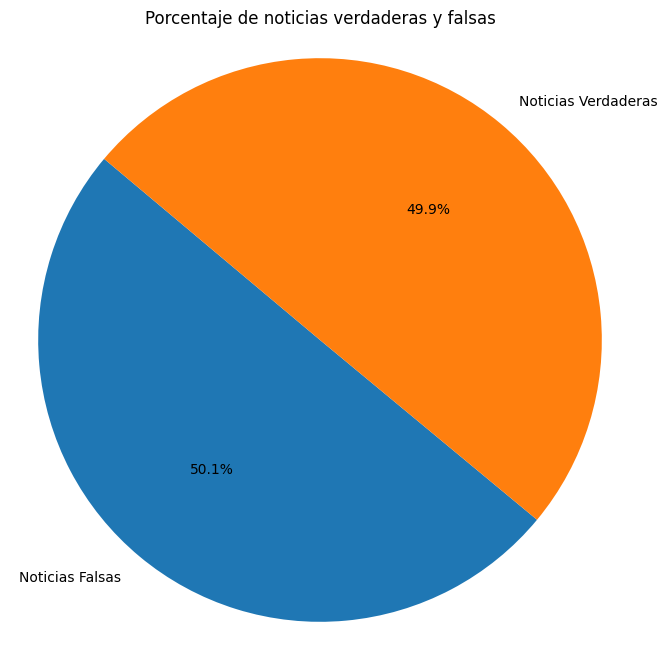

In [13]:
# Se grafica la distrinucion de las etiquetas
plt.figure(figsize=(8, 8))
etiquetas = ["Noticias Falsas","Noticias Verdaderas"]
plt.pie(df1['label'].value_counts() , labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de noticias verdaderas y falsas')
plt.axis('equal')
plt.show()

## Preprocesado de los textos

In [14]:
#En primer lugar se procesaran los noticias para lograr una mayor coherencia al tokenizar
#Se define una funcion para poder ajercer la reduccion del texto en cada registro
#Se descargan los modificadores

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preproceso_text(text):
    text = text.lower() # Convertir a minúsculas
    text = re.sub(r'[^a-z\s]', '', text)  # Eliminar caracteres no alfabéticos
    tokens = nltk.word_tokenize(text)  # Tokenizar el texto en palabras
    tokens = [word for word in tokens if word not in stop_words]# Eliminar palabras vacias
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens] #Se lematizan las palabras
    processed_text = ' '.join(lemmatized_words)# Unir las palabras procesadas en un solo texto
    return processed_text

#La idea de la funcion es reducir parte de la informacion que no contiene importancia y reducir el tamaño de los datos al minimo.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
df1["text"][0]

'SAN DIEGO  —   The   dressed in yellow and brown on Monday, making the field at Petco Park look, from above, like a grill full of cheeseburgers. The homage to the host San Diego Padres, who once wore similar uniforms, helped distinguish Home Run Derby day from every other day of this curious baseball season. Home runs are up. Way, way up. Baseball arrived at the   break with hitters on pace for more than 5, 600 home runs, a level exceeded only once in history: in 2000, at the height of the steroid era. “I’d like to say that guys aren’t cheating,” said Stephen Vogt, the Oakland Athletics’ catcher. “Everybody’s going to speculate  —   right?  —   when the home run numbers go up. But we are cleaning up the game, and I hope that’s not the reason behind it. ” Before 2003, when baseball began testing for   drugs, we searched for reasons to explain the surge in home runs. Expansion, smaller ballparks and better nutrition all played a part  —   but history, rightly, gave steroids most of the 

In [16]:
#Usamos la funcion en la columna de los textos
df1['text'] = df1['text'].apply(preproceso_text)

In [17]:
df1["text"][0]

'san diego dressed yellow brown monday making field petco park look like grill full cheeseburger homage host san diego padre wore similar uniform helped distinguish home run derby day every day curious baseball season home run way way baseball arrived break hitter pace home run level exceeded history height steroid era id like say guy arent cheating said stephen vogt oakland athletics catcher everybodys going speculate right home run number go cleaning game hope thats reason behind baseball began testing drug searched reason explain surge home run expansion smaller ballpark better nutrition played part history rightly gave steroid blame besides dee gordon last year national league leader batting average steal player caught season drug net mostly marginal perhaps slugger beating system widespread cheating epidemic seems unlikely something happening two year ago home run per team per game lowest figure last full season dating season homer per team per game put another way current pace ho

aqui se puede apreciar que la funcion funciono correctamente. Aunque aun hay algunas pocas letras que carecen de sentido.

In [18]:
#Se definen las variables independientes y dependientes y se cambia su tipo de dato para su tratamiento
X, y = df1["text"], df1["label"].values
X = X.astype(str)
y = y.astype("float32")

X correspondende a las variables independientes e "y" corresponde a la variable dependiente

In [19]:
#Se generan los tokens y sus secuencias
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
Xs=tokenizer.texts_to_sequences(X)
max_len_sequence = max([len(s) for s in Xs])
Xs = pad_sequences(Xs, maxlen= max_len_sequence, padding="post", truncating="post")

En este caso se entrena un tokenizado en base a las palabras de las diferentes noticias, para posteriormente usarlo para convertir las palabras en numeros, para luego despues normalizar el tamaño de lo transformado debido a que deben tener el mismo tamaño al ser introducido al modelo.

## Division de los datos y Entrenamiento del modelo

In [20]:
#Luego de realizar los tokens se procede a dividir en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3)
X_test, X_Validation, y_test, y_Validation =  train_test_split(X_test, y_test, test_size=0.1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_Validation.shape)
print(y_Validation.shape)

(17416, 12134)
(17416,)
(6717, 12134)
(6717,)
(747, 12134)
(747,)


In [21]:
#Se genera el modelo para generar los resultados.
vocab_size = len(tokenizer.word_index) + 1  #Se calcula el vocabulario de la tokenizacion

model= Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=256 , input_length=max_len_sequence)) #se ingresan los datos a un neurona tipo embedding para que este traduzca las palabras ingresadas y en base a su relacion con las demas palabras generar un vector especifico de cada entrada, mas entendible para ser procedadas
model.add(Dropout(0.2))# esta neurona desactiva segun un porcentaje indicado una cierta cantidad de neuronas de las capas anteriores, de esta manera se evita el sobre ajuste
model.add(Flatten()) # El vector es reducido a su minima expresion para poder ser tratado por las demas neuronas tipo dense.
model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2=0.001) )) #Las neuranas Dense con la funcion Relu son bastante buenas para tratar los datos en las capas internas.
model.add(Dropout(0.2)) # esta neurona desactiva segun un porcentaje indicado una cierta cantidad de neuraonas de las capas anteriores, de esta manera se evita el sobre ajuste
model.add(Dense(1, activation="sigmoid")) # Como solo necesitamos una sola Salida y esta debe ser binaria se utiliza la funcion sigmoide.


In [22]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"]) #La perdida considera solo una salida binaria, la metrica utilizada es accuracy ya que es precisa y facil de comprender, y el obtimizador "adam", por su eficiencia con grandes cantidades de datos.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12134, 256)        47484160  
                                                                 
 dropout (Dropout)           (None, 12134, 256)        0         
                                                                 
 flatten (Flatten)           (None, 3106304)           0         
                                                                 
 dense (Dense)               (None, 64)                198803520 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 246287745 (939.51 MB)
Trainable params: 24

In [23]:
#Epocas y bach_size
epoch=10
batch_size = 128

In [24]:
#Se entrena el modelo y obtenemos su precision
history = model.fit(X_train, y_train,
                    batch_size= batch_size,
                    epochs= epoch,
                    validation_data= (X_Validation, y_Validation))

Epoch 1/10
137/137 [==============================] - 43s 290ms/step - loss: 3.5890 - acc: 0.5135 - val_loss: 1.3744 - val_acc: 0.4967
Epoch 2/10
137/137 [==============================] - 40s 291ms/step - loss: 0.9317 - acc: 0.5229 - val_loss: 0.7453 - val_acc: 0.5716
Epoch 3/10
137/137 [==============================] - 41s 297ms/step - loss: 0.6045 - acc: 0.7356 - val_loss: 0.4843 - val_acc: 0.8300
Epoch 4/10
137/137 [==============================] - 39s 282ms/step - loss: 0.3176 - acc: 0.9285 - val_loss: 0.2450 - val_acc: 0.9478
Epoch 5/10
137/137 [==============================] - 38s 281ms/step - loss: 0.1641 - acc: 0.9780 - val_loss: 0.2302 - val_acc: 0.9424
Epoch 6/10
137/137 [==============================] - 39s 286ms/step - loss: 0.1051 - acc: 0.9925 - val_loss: 0.1817 - val_acc: 0.9545
Epoch 7/10
137/137 [==============================] - 38s 278ms/step - loss: 0.0697 - acc: 0.9966 - val_loss: 0.1576 - val_acc: 0.9558
Epoch 8/10
137/137 [==============================] - 3

La cantidad de epocas necesarias para el modelo en este caso es de 10, debido a:

- Gran presicion desde la tercera epoca en adelante
- La presicion final de validacion se mantiene por mucho que tenga mas epocas.
- Menor tiempo de uso de recursos necesario / menor gasto a largo plazo
- Mayor eficiencia, utilizacion de recursos mejor aprovechada

## Prueba del modelo Con diferentes noticias

210/210 [==============================] - 2s 9ms/step
   Real  Predicho
0   1.0  0.984194
1   1.0  0.999273
2   0.0  0.000292
3   1.0  0.999913
4   1.0  0.999928
5   0.0  0.000037
6   1.0  0.997707
7   1.0  0.481162
8   1.0  0.882745
9   1.0  0.999810 



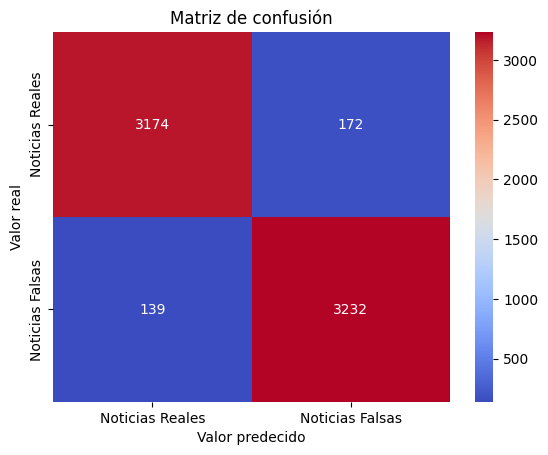


La precision del modelo es: 0.9536995682596398



In [25]:
# Realizar predicciones en el conjunto de prueba
predicciones = model.predict(X_test)

# Convertir las probabilidades predichas a etiquetas binarias (0 o 1)
predicciones_ = (predicciones).astype("float32").flatten()

# Crear un DataFrame con las predicciones
df_predictions = pd.DataFrame({
    'Real': y_test,
    'Predicho': predicciones_
})

# Mostrar los primeros registros del DataFrame y sus respectivas predicciones de ejemplo
print(df_predictions.head(10),"\n")

def Prediccion_binaria(Predicciones):
  if Predicciones >= 0.5:
    Predicciones = 1
  else:
    Predicciones = 0
  return Predicciones

Predicciones = df_predictions["Predicho"].apply(Prediccion_binaria)

Cf_0 = confusion_matrix(y_test,Predicciones)
Precision_0 = accuracy_score(y_test,Predicciones)

#Graficamos el mapa de calor

sns.heatmap(Cf_0, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=["Noticias Reales","Noticias Falsas"], yticklabels=["Noticias Reales","Noticias Falsas"])
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_0}\n")

Con la matriz de confucion podemos decir que los noticias reales y falsas son relativamente acertadas por el modelo, con una presicion de las valores del test del 95,36% podemos decir que es bastante acertado, siempre que las noticias ingresadas sean coherentes y acertadas

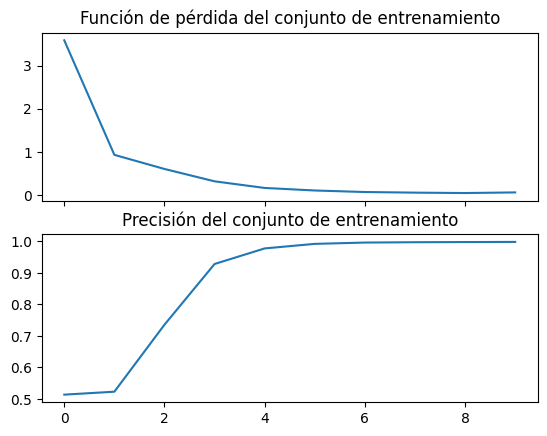

In [26]:
#Grafica de la perdida y presicion del modelo
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')

ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history.history['acc'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

En la grafica anterior se puede apreciar que la perdida va disminuyendo a medida que avanzan las epocas en el modelo y en cambio la presicion aumenta conforme avanzan las epocas mostrando el aprendizaje del modelo.

In [27]:
#Noticias de prueba

#Noticia falsa
textf=("These concerns focus on millions of dollars that Comey accepted from a Clinton Foundation defense contractor, Comey’s former membership on a Clinton Foundation corporate partner’s board, and his surprising financial relationship with his brother Peter Comey, who works at the law firm that does the Clinton Foundation’s taxes. Lockheed Martin When President Obama nominated Comey to become FBI director in 2013, Comey promised the United States Senate that he would recuse himself on all cases involving former employers. But Comey earned $6 million in one year alone from Lockheed Martin. Lockheed Martin became a Clinton Foundation donor that very year. Comey served as deputy attorney general under John Ashcroft for two years of the Bush administration. When he left the Bush administration, he went directly to Lockheed Martin and became vice president, acting as a general counsel. How much money did James Comey make from Lockheed Martin in his last year with the company, which he left in 2010? More than $6 million in compensation. Lockheed Martin is a Clinton Foundation donor. The company admitted to becoming a Clinton Global Initiative member in 2010. According to records, Lockheed Martin is also a member of the American Chamber of Commerce in Egypt, which paid Bill Clinton $250,000 to deliver a speech in 2010. In 2010, Lockheed Martin won 17 approvals for private contracts from the Hillary Clinton State Department. HSBC Holdings In 2013, Comey became a board member, a director, and a Financial System Vulnerabilities Committee member of the London bank HSBC Holdings. “Mr. Comey’s appointment will be for an initial three-year term which, subject to re-election by shareholders, will expire at the conclusion of the 2016 Annual General Meeting,” according to HSBC company records. HSBC Holdings and its various philanthropic branches routinely partner with the Clinton Foundation. For instance, HSBC Holdings has partnered with Deutsche Bank through the Clinton Foundation to “retrofit 1,500 to 2,500 housing units, primarily in the low- to moderate-income sector” in “New York City.” “Retrofitting” refers to a Green initiative to conserve energy in commercial housing units. Clinton Foundation records show that the Foundation projected “$1 billion in financing” for this Green initiative to conserve people’s energy in low-income housing units. Who Is Peter Comey? When our source called the Chinatown offices of D.C. law firm DLA Piper and asked for “Peter Comey,” a receptionist immediately put him through to Comey’s direct line. But Peter Comey is not featured on the DLA Piper website. Peter Comey serves as “Senior Director of Real Estate Operations for the Americas” for DLA Piper. James Comey was not questioned about his relationship with Peter Comey in his confirmation hearing. DLA Piper is the firm that performed the independent audit of the Clinton Foundation in November during Clinton-World’s first big push to put the email scandal behind them. DLA Piper’s employees taken as a whole represent a major Hillary Clinton 2016 campaign donation bloc and Clinton Foundation donation base. DLA Piper ranks #5 on Hillary Clinton’s all-time career Top Contributors list, just ahead of Goldman Sachs. And here is another thing: Peter Comey has a mortgage on his house that is owned by his brother James Comey, the FBI director. Peter Comey’s financial records, obtained by Breitbart News, show that he bought a $950,000 house in Vienna, Virginia, in June 2008. He needed a $712,500 mortgage from First Savings Mortgage Corporation. But on January 31, 2011, James Comey and his wife stepped in to become Private Party lenders. They granted a mortgage on the house for $711,000. Financial records suggest that Peter Comey took out two such mortgages from his brother that day. This financial relationship between the Comey brothers began prior to James Comey’s nomination to become director of the FBI. DLA Piper did not answer Breitbart News’ question as to whether James Comey and Peter Comey spoke at any point about this mortgage or anything else during the Clinton email investigation. Peter Comey Re-Designed the FBI Building FBI Director James Comey grew up in the New Jersey suburbs with his brother Peter. Both Comeys were briefly taken captive in 1977 by the “Ramsey rapist,” but the boys managed to escape through a window in their home, and neither boy was harmed. James Comey became a prosecutor who worked on the Gambino crime family case. He went on to the Bush administration, a handful of private sector jobs, and then the Obama administration in 2013. Peter Comey, meanwhile, went into construction. After getting an MBA in real estate and urban development from George Washington University in 1998, Peter Comey became an executive at a company that re-designed George Washington University between 2004 and 2007 while his brother was in town working for the Bush administration. In January 2009, at the beginning of the Obama administration, Peter Comey became “a real estate and construction consultant” for Procon Consulting.Procon Consulting’s client list includes “FBI Headquarters Washington, DC.” So what did Procon Consulting do for FBI Headquarters? Quite a bit, apparently. According to the firm’s records: Procon provided strategic project management for the consolidation of over 11,000 FBI personnel into one, high security, facility. Since 1972 the Federal Bureau of Investigation has had its headquarters in a purpose built 2.1 million square foot building on Pennsylvania Avenue. Having become functionally obsolete and in need of major repairs, GSA and the FBI were considering ways to meet the space needs required to maintain the Bureau’s mission and consolidate over 11,000 personnel. Procon assisted GSA in assessing the FBI’s space needs and options for fulfilling those needs. Services provided included project management related to site evaluations, budgeting, due diligence, and the development of procurement and funding strategies. Those “funding strategies” included talking to “stakeholders”: “Worked with stakeholders and key leadership to identify strategic objectives, goals and long range plans for capital and real estate projects.” Procon Consulting obtained its contract for FBI Headquarters prior to James Comey’s nomination to serve as director of the FBI. In June 2011, Peter Comey left Procon Consulting to become “Senior Director of Real Estate Operations for the Americas” for DLA Piper. Peter Comey has generated some controversy in that role. According to Law360 in May 2013 (the same month that James Comey was confirmed as someone being considered by Obama to become FBI director): Two real estate services businesses filed a $10 million suit against the law firm Monday alleging it stiffed them on as much as $760,000 of work done at DLA Piper’s Chicago office and improperly gave proprietary information to a competitor. The plaintiffs take particular aim at Peter Comey, DLA Piper’s senior director of real estate operations. Leasecorp and SpaceLogik include several emails in the complaint that are purportedly from DLA Piper senior real estate partners Jay Epstein and Rich Klawiter and are sharply critical of Comey’s handling of the matter. In one email, Epstein wrote that “it’s an embarrassment for the firm to be treating someone who we are working with like this.” In another email allegedly from Klawiter on Feb. 20, the DLA Piper partner informed Leasecorp President Michael Walker, a principal for both plaintiffs, that Comey had sent him and Epstein an email claiming that the real estate services firms were behind on their contractual obligations. “I just received an email from Peter (Jay was also a recipient) that is so inflammatory I can’t even send it or you’ll hit the roof,” Klawiter said in the email, according to the complaint. “This is not going to end well.”")

#Noticia verdadera
textv=("Kathryn Nesbitt had spent a decade balancing parallel careers in analytical chemistry and soccer officiating when, in 2019, she put her scientific brain to work and synthesized a solution for the most pragmatic path forward. Two weeks before Nesbitt left for France to serve as an assistant referee at the Women’s World Cup, she stepped down from her assistant professor position at Towson University to focus on officiating full time. What data points informed that decision? She reached the pinnacle of women’s soccer refereeing that summer and had broken into top-flight men’s soccer as well, with dozens of MLS games under her belt. Knowing the 2026 men’s World Cup would be held in the United States, Canada and Mexico, Nesbitt mapped out a plan that would culminate in her being on the sideline of the sport’s premier spectacle. “I had no idea if they’d ever let women officiate at that World Cup, but I wanted to see if I could do that,” said Nesbitt, 34. “I realized at the time that in order to even attempt that, I would need to dedicate all of my time and effort into one job.” Once Nesbitt shifted her focus to officiating, her ascent accelerated. In 2020, she claimed MLS assistant referee of the year honors and became the first woman to officiate an MLS Cup final. A few months later, Concacaf — the confederation that oversees soccer in North America, Central America and the Caribbean — tasked her with men’s World Cup qualifying assignments. By the time FIFA, soccer’s global governing body, announced its pool of referees for the 2022 World Cup in Qatar, the Philadelphia-based official thought she might have a shot.On May 19, Nesbitt woke up, scrolled through Twitter and saw FIFA’s unveiling. The tournament, FIFA stated in its announcement, would feature the first female referees in the 92-year history of the men’s World Cup, with six women among the 129 officials. Zooming in on the 69 assistant referees, she saw the listing: “NESBITT Kathryn. USA.” “I just got jaw-dropped, stared at it, couldn’t even believe that this was happening,” Nesbitt recalled. “Then I probably jumped around the room for the next 20 minutes.” Nesbitt prides herself, as a referee or a chemist, in processing the information at her disposal and arriving at the right conclusion. But in calculating her path to a men’s World Cup assignment, she shortchanged herself — by four years, in fact. “She certainly achieves the highest standard in everything that she does,” said Mark Geiger, a former MLS, Olympic and World Cup referee who now serves as the director of senior match officials at the U.S.-based Professional Referee Organization. “She doesn’t settle for anything. She sets goals for herself, and she does everything that she possibly can to achieve those goals, whether it’s in the science field or whether it’s on the soccer field.”A soccer player in her youth, Nesbitt was a restless 14-year-old sitting through her little brother’s games in Rochester, N.Y., when she first volunteered to be an assistant referee (commonly known as a linesman). The role typically involves making throw-in, goal kick, corner kick, foul and offside calls, but as a teen volunteer with a familial conflict of interest, Nesbitt was simply asked to wave the flag when the ball went out of bounds and leave the rest to the paid referee. “Then one of the guys actually asked me, ‘Hey, would you like to make money doing this?’ ” Nesbitt said. “And I was like, ‘Yeah, that sounds great.’ ”A senior-level figure skater and a volleyball player who competed for St. John Fisher University in Rochester, Nesbitt divided her time among no shortage of athletic exploits. Around the time she was wrapping up her college career, she began serving as a fourth official — a largely administrative role stationed between the team benches — for games involving Rochester’s minor league men’s team. Before long, Nesbitt landed a spot in a now-defunct U.S. Soccer program for fast-tracking top officiating prospects. In 2013, she became an assistant referee for the NWSL. Felisha Mariscal broke through as an MLS official a year later, and Nesbitt made her MLS debut in 2015.But even as she rose up the ranks, soccer remained a side hustle. After studying chemistry as a graduate student at the University of Pittsburgh and completing a postdoctoral research fellowship at Michigan, Nesbitt joined the faculty at Towson, a public university in Maryland, in 2017. For the better part of two years, she did some 50 hours of lab research per week. Most Friday nights, Nesbitt would crawl to the airport through Baltimore rush-hour traffic and hop on a plane — to Los Angeles, Minnesota or wherever else her MLS assignments took her. After officiating a match, she would fly back Sunday night and do it all again. “She managed those competing responsibilities exceptionally well,” said John Sivey, a professor who worked with Nesbitt in Towson’s chemistry department. “I don’t know how she did it, to be very honest, because the demands of both of those careers can be pretty substantial.” After those long days of lab research, Nesbitt would flip on MLS games or devour film of the teams she would be officiating that weekend. Deeply understanding each club’s players and tactics allows her to better anticipate the flow of the game, she reasoned, and helps her parlay her strengths in academia to the soccer pitch.“One of the characteristics that I think strongly overlaps between a very good sports official and a very good analytical chemist is precision,” said Sivey, himself a former high school baseball and softball umpire and basketball referee. “For precision in analytical chemistry, we basically mean: How repeatable or reproducible is a particular experiment? In the sports officiating world, I think that looks a lot like consistency.” To Geiger, who officiated alongside Nesbitt before retiring as a referee in 2019, that precision is just one of Nesbitt’s strengths. As a 6-foot former college athlete, she has no problem acing refereeing fitness standards designed for men. And Geiger can’t recall seeing her rattled, even in games that threatened to spiral out of the referee crew’s control. “She not only can analyze what the correct decision should be, but she also knows from a feeling aspect what the best decision for the game would be,” Geiger said. “And they’re not always the same. Sometimes you need to really feel the game and know what the best decision is at that particular moment and what’s going to help the referee group maintain control of the game. She understands that.” Although MLS recently completed its eighth season using female referees, Nesbitt last year became the first woman to officiate Concacaf men’s World Cup qualifying games. She remembered getting plenty of stares from players, especially in those first few matches. Nesbitt said match coordinators also tended to mistakenly assume she was just the fourth official, there to help with substitutions and timekeeping but not roam the pitch. “One of the biggest things I’ve learned in my career — and this has been in chemistry too, both being very male-heavy areas — is the best way to impress is to do your job well,” Nesbitt said. “But it would always be funny the first time I would do a sprint with one of the players down to the corner flag, and he’d look over, and I’d be keeping up with him. I think that had a really big effect just gaining some respect.”Within months of her first men’s qualifier, Nesbitt had gained enough respect to book her ticket to Qatar. On that May morning when FIFA unveiled the World Cup officials, Sivey went door to door through the Towson chemistry department to excitedly share the news of their former colleague’s new assignment. USMNT’s Walker Zimmerman is a very good soccer player. He might be a better teammate. Eventually, Nesbitt figures she will hang up her cleats, stash away her flag and return to chemistry. For now, though, she understands her status as a soccer trailblazer — even if hearing that label prompts her to let out an embarrassed groan. As she prepares to make World Cup history, Nesbitt revels, appropriately enough, in the satisfaction that she made the right call back in 2019. “This was an impossible dream for me, and just being able to witness females at this event now makes this realistic for all women,” Nesbitt said. “Whether it be in refereeing, whether it be in a different sport, whether it be in something completely different — sometimes just having a visual like that can make something actually be real. If I get to play even a small role in that, that’s really cool.”")

#Nos aseguramos que todos sus caracteres sean str
textf = np.str_(textf)
textv = np.str_(textv)

#Se procesa para eliminar texto que carezca de informacion.

textf = preproceso_text(textf)
textv = preproceso_text(textv)

#Se tokeniza en base a al tokenizador entrenado
textf = tokenizer.texts_to_sequences(textf)
textv = tokenizer.texts_to_sequences(textv)

#Como esta en un formato de listas anidadas se iteral para que quede solo una y sea procesable para el padding
textf = list(chain.from_iterable(textf))
textv = list(chain.from_iterable(textv))

#Se les realiza paddin para poder ingresarlas al modelo con los caracteres necesarios
textf = pad_sequences([textf], maxlen=max_len_sequence, padding="post", truncating="post")
textv = pad_sequences([textv], maxlen=max_len_sequence, padding="post", truncating="post")


In [28]:
#Se predice su etiqueta
predictionsf = model.predict(textf)
predictionsv = model.predict(textv)

#Se conviernten en un numero flotante para ser mostrado
noticia_falsa = float(predictionsf)
noticia_verdadera = float(predictionsv)

1/1 [==============================] - 0s 17ms/step


<ipython-input-28-dc28333dbddf>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noticia_falsa = float(predictionsf)
<ipython-input-28-dc28333dbddf>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noticia_verdadera = float(predictionsv)


In [29]:
print(predictionsf)
print(predictionsv)

[[6.770613e-08]]
[[5.6513755e-07]]


In [30]:
print("Para la noticia Falsa el modelo predijo que es una noticia:", ("Verdadera" if round(noticia_falsa) == 1 else "Falsa" ))
print("Para la noticia Verdadera el modelo predijo que es una noticia:", ("Verdadera" if round(noticia_verdadera) == 1 else "Falsa" ))

Para la noticia Falsa el modelo predijo que es una noticia: Falsa
Para la noticia Verdadera el modelo predijo que es una noticia: Falsa


Ahora que el modelo hizo la prediccion de las noticias que fueron propuestas por el proyecto y con muchas puestas a pruebas en diferentes modelos entrenados, podemos decir que el modelo no es totalmente preciso, que como anteriormente fue mencionado tiene una presicion del 95% tiene un porcentaje a equivocarse, pero como las noticias anteriormente mencionadas, si bien se tiene su fuente quizas no eran consisas o quizas tienen una etiqueta equivocada se procedera a revisar otras dos que son propuestas como prueba. con las siguientes fuentes:

noticia real:

- https://english.elpais.com/science-tech/2024-07-05/the-biggest-hit-songs-have-increasingly-simple-and-repetitive-melodies.html

noticia falsa:

- https://www.bbc.com/news/articles/cj5l4e4v350o

In [31]:
#Noticias de prueba parte 2

#Noticia falsa 2
textf2=("The government should publish advice for its departments on engaging with young people, including on TikTok, a group of MPs has said. The culture, media and sport committee has been looking into countering disinformation online. Its call comes despite TikTok currently being banned on government devices due to data security concerns. Accurate information needs to be communicated in a relatable way, the MPs say. The committee says that countering misinformation is particularly important for young people, who are increasingly turning away from traditional media and towards social media for their information. It advises meeting young people where they are - with 15 to 24 year olds spending around an hour per day on TikTok, according to media regulator Ofcom. The report says: The Government must have a clear strategy for communicating with young people and adapting to the development of new apps and platforms which appeal to this audience. Some MPs do still use TikTok, despite the fact it is blocked on the Parliament Wi-Fi network. Defence Secretary Grant Shapps has almost 20,000 followers, though he says he does not have the app on his personal phone. Grant knows that TikTok can be a valuable tool for communicating with his constituents, a source close to Mr Shapps told the BBC in September 2023. The Ministry of Defence also operates a separate account which has about 17,500 followers. TikTok is under pressure in many countries over its links to the Chinese state - links it has always denied - with law-makers in the US recently passing legislation saying it should be sold or banned. It has though endorsed the committee's findings. We welcome this report's recommendation that the Government should engage with the public on whatever platform they choose to use, it said in a statement. The government has responded to the committee report by saying it makes efforts to reach people directly on the platforms they spend the most time on. It adds that the Online Safety Act, which came into law last year, will also help tackle the root cause of disinformation by requiring social media companies to swiftly remove illegal misinformation and disinformation as soon as they become aware of it. But the law was criticised at the time by fact-checking service Full Fact, which said it did not go far enough to address the way that platforms treat harmful misinformation and disinformation. The MPs took evidence from over 60 different people prior to publishing their report, including disinformation experts and journalists. Among these were BBC journalists Rebecca Skippage and Marianna Spring.Also interviewed were financial journalist Martin Lewis, Channel 4 journalist Georgina Lee and the chief executive of Full Fact Will Moy.")

#Noticia verdadera2
textv2=("They no longer make songs like they used to. And this is not just being said out of nostalgia by the musical critics who lived through the musical revolutions of the 1960s and 1970s. A study that analyzed the biggest musical hits in the United States, between 1950 and 2022, has confirmed this, using scientific evidence. The researchers concluded that the melodies of the most popular songs are increasingly simple and repetitive. However, they clarify that this does not mean that today’s musical hits are worse or poorer musically, but rather that the complexity and richness in elements other than the melody are less evident. For the public, melodies are what stand out most in pop music, but science has done little research into the ingredients that determine its success. Madeline Hamilton, lead author of new research published Thursday in the journal Scientific Reports, wanted to devote her doctoral dissertation to this issue. “I would argue that the melody, especially the lead vocal melody, is the most significant dimension of a song. It’s usually what we remember about it and what you sing or whistle when you’re listening to it — not the bass line or the drum beat,” says Hamilton. So she thought she should start with the melody when she set out to investigate “why we like the music we like, and how we might predict whether a person is going to enjoy a particular piece of music. This led to a “happy accident,” says the researcher. When she began to explore the melodies and analyze them, she first observed that over the years the number of musical notes per second was increasing. And then she discovered something she wasn’t looking for: she saw that the parameters she used to measure the complexity of melodies had been decreasing since the 1950s. In that decade, songs such as Domenico Modugno’s Nel blu dipinto di blu (Volare), which topped the chart in the United States, were triumphing. Hamilton wanted to confirm her chance discovery and carried out a more in-depth analysis, together with Marcus Pearce, her supervisor at the music cognition laboratory at Queen Mary University of London. The first big challenge was to build their own catalog of high-quality and detailed musical transcriptions. Until then, there had not been one large enough, and that greatly limited the quantitative study of the melodies. Most previous research in computer science applied to music had been done directly from audio cuts of songs, which reduced the study to very basic elements, such as the tempo of the songs or the timbre of the instruments. The analysis of these characteristics is now fairly automated and, with the help of artificial intelligence, is used by streaming services — such as Spotify, Tidal or Apple Music — to suggest songs similar to the ones we listen to. A very musical lockdow In order to go further and scientifically study something more abstract, such as melodies, Hamilton had to carry out the meticulous task of manually transcribing the vocal part of the songs. She did this during the first year of the Covid-19 pandemic, coinciding with the lockdown in London. “For two months, I spent about 10 hours a day to this task that requires intense concentration and attention to detail. At that time, it’s not like I had anything better to do than sit in my room transcribing music,” the researcher recalls. After six months, she finally finished recording the notes and rhythmic structure of the most popular melodies of the last seven decades. Her catalog includes the five biggest hits of each year, according to the American Billboard Hot 100, which is based on record sales, radio station plays and streaming. She then polished and expanded the catalog, which is available online for public use and now covers from 1950 to 2022. It contains a total of 366 songs, with their melodic fragments encoded in more than 1,000 digital files in MIDI format. Hamilton and Pearce subjected all this material to a statistical analysis with algorithms for the detection of change points. They settled on eight parameters that allow the melodies to be described with data. And through sophisticated computer calculations, they were able to confirm their initial discovery that melodies have become increasingly simple over the last seven decades. What’s more, the researchers observed that — unlike what has been seen in previously studied elements, such as the harmony and timbre of the instruments used — in the evolution of melodies, there are no cycles in which trends come and ago. Instead, the fall in complexity has been a constant. In their article, the researchers also point out that there were two very pronounced drops in melodic complexity around 1975 and 2000. The authors attribute this to the influence of new styles such as disco music and hip hop, respectively. The researchers also found that in the last two decades, there has been a significant increase in melodic repetitions within songs, which they relate to loops. These sound loops were first characteristic of rap, and today they have become widespread in pop music. But the researchers stress that the scientific evidence does not mean that today’s greatest hits are worse than the hits of the past. When explaining this shift, the study argues: “The decrease in the complexity of melodies may be associated with aspects of the modern predicament. In other words, it may be an evolutionary adaptation to a musical world in which faster songs — more notes per second —, with multiple vocal layers and instruments, and high-quality sound, are topping the charts. In order to avoid overwhelming the listeners, musicians may be choosing to simplify the melodies. “For example, the melody features small pitch intervals, a limited range of pitches, and lots of repetition,” the study states. This is evident in songs like Bad Guy, by Billie Eilish, which reached No. 1 in the U.S. in 2019. However, the researchers recognize that more than just the top five hits of each year need to be analyzed. Hamilton is already working on expanding their catalog of the most successful melodies and is confident that, with the current momentum in generative artificial intelligence, “in a few years, we will be able to make automatic transcriptions of the melodies while maintaining high quality.” With the help of AI, she could provide more complete scientific interpretations of the evolution of music and, perhaps, return to her original idea of discovering why we like the music we like.")

#Nos aseguramos que todos sus caracteres sean str
textf2 = np.str_(textf2)
textv2 = np.str_(textv2)

#Se procesa para eliminar texto que carezca de informacion.

textf2 = preproceso_text(textf2)
textv2 = preproceso_text(textv2)

#Se tokeniza en base a al tokenizador entrenado
textf2 = tokenizer.texts_to_sequences(textf2)
textv2 = tokenizer.texts_to_sequences(textv2)

#Como esta en un formato de listas anidadas se iteral para que quede solo una y sea procesable para el padding
textf2 = list(chain.from_iterable(textf2))
textv2 = list(chain.from_iterable(textv2))

#Se les realiza paddin para poder ingresarlas al modelo con los caracteres necesarios
textf2 = pad_sequences([textf2], maxlen=max_len_sequence, padding="post", truncating="post")
textv2 = pad_sequences([textv2], maxlen=max_len_sequence, padding="post", truncating="post")


In [33]:
#Se predice su etiqueta
predictionsf2 = model.predict(textf2)
predictionsv2 = model.predict(textv2)

#Se conviernten en un numero flotante para ser mostrado
noticia_falsa2 = float(predictionsf2)
noticia_verdadera2 = float(predictionsv2)

1/1 [==============================] - 0s 20ms/step


<ipython-input-33-0495d0a09391>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noticia_falsa2 = float(predictionsf2)
<ipython-input-33-0495d0a09391>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  noticia_verdadera2 = float(predictionsv2)


In [34]:
print(predictionsf2)
print(predictionsv2)

[[2.219934e-08]]
[[3.1773372e-06]]


In [35]:
#Se muestra el resulta de las noticias

print("Para la noticia Falsa el modelo predijo que es una noticia:", ("Verdadera" if round(noticia_falsa2) == 1 else "Falsa" ))
print("Para la noticia Verdadera el modelo predijo que es una noticia:", ("Verdadera" if round(noticia_verdadera2) == 1 else "Falsa" ))

Para la noticia Falsa el modelo predijo que es una noticia: Falsa
Para la noticia Verdadera el modelo predijo que es una noticia: Falsa


Aqui podemos decir que el modelo posee un sesgo a decir que una noticia es falsa, esto puede deberse por un sobre ajuste en el modelo o bien que las noticias con las que fue entrenado el modelo fueron pocas o bien estas mismas noticias son muy parecidas a las falsas, cabe decir que entrenar el modelo con mas noticias hace que se usen mas recursos que por lo menos colab no puede soportar.

El modelo para ser probado en otro tipo de plataforma, se puede guardar como un archivo y luego ser cargado para las diferentes pruebas.

In [ ]:
# Supongamos que 'modelo' es tu modelo Keras ya entrenado
model.save('DetectedNews_1')  # Guarda el modelo en un archivo llamado 'modelo.h5'

# Para cargar el modelo más tarde
#modelo_cargado = load_model('DetectedNews_1')

Lo mismo sucede con el tokenizar, que es bien importante a la hora de ingresar los datos al modelo.

In [ ]:
import pickle

# Supongamos que 'tokenizer' es tu tokenizador de Keras
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Para cargar el tokenizador más tarde
#with open('tokenizer.pickle', 'rb') as handle:
    #tokenizer_cargado = pickle.load(handle)

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

## Division del dataset y preparacion de los datos

In [3]:
#Cargamos el df, en este caso el df viene definido con un set de entrenamiento y de testeo
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#revisamos el formato de los datos
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
#Se generan el conjunto de 10 entradas para su posterior prediccion
x_test, x_p, y_test, y_p = train_test_split(x_test, y_test, test_size=0.001)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#Denominadas con el sufijo p corresponde al conjunto de prediccion final
print(x_p.shape)
print(y_p.shape)

(60000, 28, 28)
(60000,)
(9990, 28, 28)
(9990,)
(10, 28, 28)
(10,)


En este caso las etiquetas o variable dependiente corresponden al mismo numero de las variables, es decir si la variable y tiene un 5 es porque el numero descrito en la matriz de 28x28 es un 5, lo mismo sucede con las demas etiquetas.


In [6]:
print(y_train[0])
print(y_train[10])
print(y_train[50])

5
3
3


3


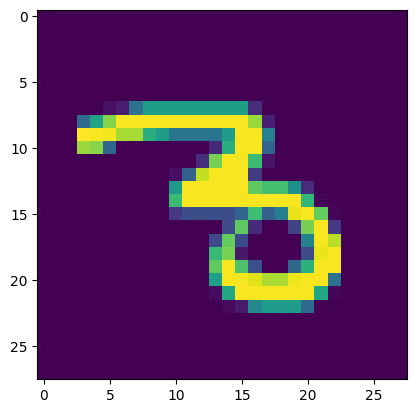

In [7]:
#Revisamos de forma grafica la informacion de la matriz en el registro 30
plt.imshow(x_train[30])
print(y_train[30])

In [8]:
#Se crea un diccionario segun las valores de cada etiqueta
name = [
    '0',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9'
    ]

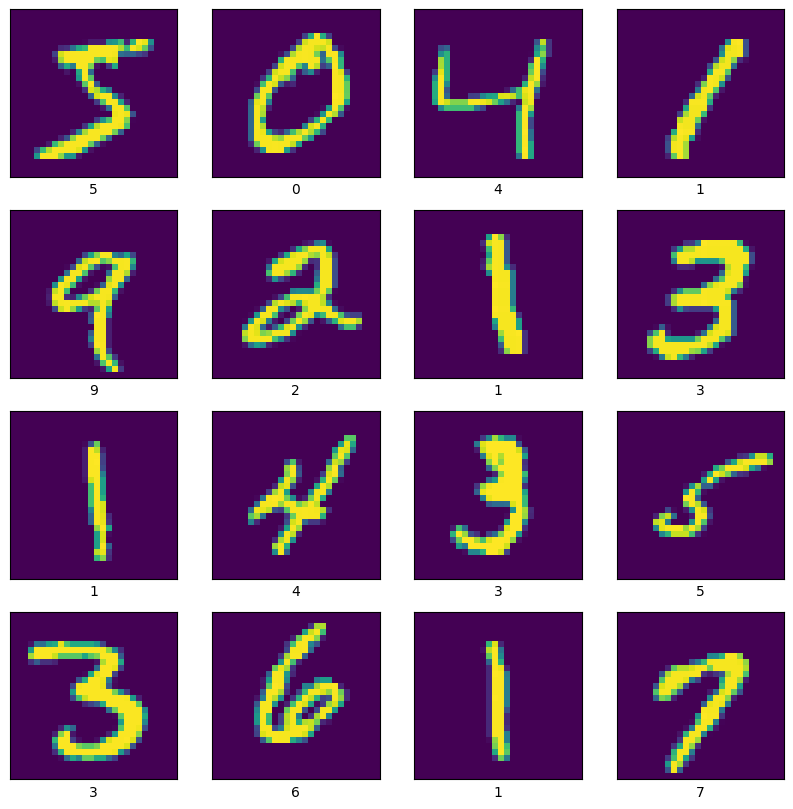

In [9]:
#Se muetran visualmente las 16 primeras matrices
plt.figure(figsize=(10, 10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[i])
  plt.xlabel(name[y_train[i]])
  plt.xticks([])
  plt.yticks([])

In [10]:
#Se muetra el formato de la variable dependiente
print(y_train[10])

3


In [11]:
#Resulta que para el modelo, se necesitan 10 salidas, donde estas indican cual es el numero dentro de la matriz pero actualmente solo tenemos en la variable el valor correspondiente al numero de la matriz, por lo que hay que hacer variables dummy para lograr las 10 salidas y que solo una sea la que corresponda, en este caso de manera binaria
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [12]:
#Se muestra el nuevo formato de la variable dependiente
print(y_train[10])

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


Para este caso las variables dependientes, fueron generadas a variables dummies binarias, el 1 el la posicion indicada especifica la etiqueta de la matriz en la entrada correspondiente, es decir si el 1 esta en el primer indice(o indice 0) este indica que la matriz corresponde a un 0, y lo mismo si el 1 esta en 6 indice (o indice 5), este indica que el numero corresponde a la etiqueta del numero 5

In [13]:
#Se revisan los valores unicos de las matrices
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [14]:
#Se cambia el tipo de dato de las matrices para poder hacer mas eficientes los calculos realizados por el modelo, ademas tambien se genera un escalado (255 debido a los datos de la matriz) de las entradas, de esta manera tendremos valores entre 0 y 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_p = x_p.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0
x_p = x_p / 255.0

In [15]:
#Se le grega una dimencion solo para lograr ser procesado el modelo debido a las caracteristicas de este batch_size, height, width, channels
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_p = np.expand_dims(x_p, axis=-1)

## Entrenamiendo del modelo

In [16]:
#Ahora se generara el modelo segun las necesidades solicitadas
num_classes = 10

model1 = Sequential()
model1.add(Conv2D(28, 3, padding='same', input_shape=x_train.shape[1:], activation='relu')) #En estos caso se usaran neuronas convolucionales ya que estas se especializan en el tratamiento de datos de imagenes o mejor dicho matrices de ciertas caracteristicas
model1.add(Conv2D(32, 3, activation='relu')) # Se generalmente la funcion de activacion relu es eficiente en las capas ocultas de la red neuronal
model1.add(MaxPooling2D()) #Esta capa es en especifico para reducir el tamaño de las matrices generadas por las capas anteriores, de esta manera se conserva la informacion pero con un menor tamaño
model1.add(Dropout(0.25)) # esta neurona desactiva segun un porcentaje indicado una cierta cantidad de neuraonas de las capas anteriores, de esta manera se evita el sobre ajuste

model1.add(Conv2D(64, 3, padding='same', activation='relu')) #Se repite el proceso anterior para una mayor deficion y ajuste del modelo
model1.add(Conv2D(64, 3, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Dropout(0.25))

model1.add(Flatten()) # Esta neurona solo prepara o bien reduce la cantidad de dimenciones en la que viene los datos para que sean entendibles para las neuronas posteriores que en especifico son capas densas, que conectan entre si con todos los datos
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))# por ultimo se usa un capa densa con la cantidad de salidas correspondientes a las etiquetas y una funcion de activacion para este tipo de salidas de multietiquetas


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        8096      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                        

In [17]:
#Se compila el modelo segun la perdida de categorical crossentropy debido a que tenemos 10 salidas, y se mide la presicion con la metrica de accuracy
model1.compile(optimizers.RMSprop(learning_rate=0.0001, momentum=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

In [18]:
#Se entrena el modelo
batch_size = 32
epochs = 8
history_1 = model1.fit(x_train, y_train,
                    batch_size= batch_size,
                    epochs= epochs,
                    validation_data= (x_test, y_test))

Epoch 1/8
1875/1875 [==============================] - 267s 141ms/step - loss: 0.4403 - acc: 0.8600 - val_loss: 0.0923 - val_acc: 0.9716
Epoch 2/8
1875/1875 [==============================] - 301s 160ms/step - loss: 0.1238 - acc: 0.9616 - val_loss: 0.0595 - val_acc: 0.9807
Epoch 3/8
1875/1875 [==============================] - 242s 129ms/step - loss: 0.0857 - acc: 0.9732 - val_loss: 0.0429 - val_acc: 0.9851
Epoch 4/8
1875/1875 [==============================] - 233s 124ms/step - loss: 0.0704 - acc: 0.9779 - val_loss: 0.0368 - val_acc: 0.9868
Epoch 5/8
1875/1875 [==============================] - 231s 123ms/step - loss: 0.0605 - acc: 0.9819 - val_loss: 0.0303 - val_acc: 0.9899
Epoch 6/8
1875/1875 [==============================] - 231s 123ms/step - loss: 0.0532 - acc: 0.9841 - val_loss: 0.0273 - val_acc: 0.9910
Epoch 7/8
1875/1875 [==============================] - 232s 124ms/step - loss: 0.0468 - acc: 0.9855 - val_loss: 0.0253 - val_acc: 0.9910
Epoch 8/8
1875/1875 [====================

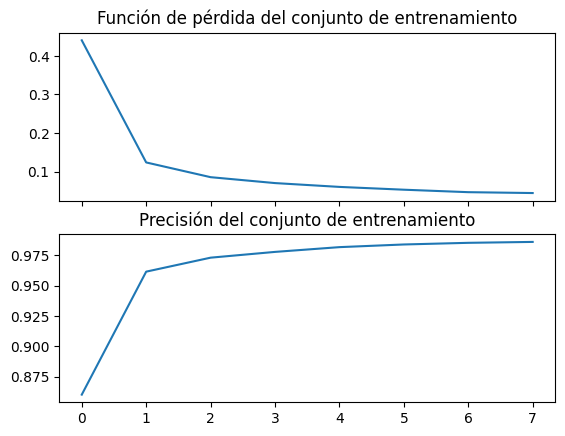

In [19]:
#Se grafica la perdida y presicion del modelo en cada epoca

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history_1.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')
ax2 = fig.add_subplot(2,1,2, sharex= ax1)
ax2.plot(history_1.history['acc'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

En este caso para el modelo las epocas elegidas son 8 debido a que generalmente
 10 epocas son mas que sufientes para tener una buena precision del modelo, y se puede comprobar con las graficas donde se aprecia que la curva de la funcion de perdida esta por debajo del 0.1 lo que es muy poca perdida al contrario de la funcion de la precision que sube a un valor superior de 0.975, lo que indica una muy buena precision, aunque se puede apreciar en el registro que hay una buena precision desde la segunda epoca, asi que cualquier epoca entre 2 y 10 es un buen numero, pero en este caso no aseguramos con las 8 para tener la mejor precision posible.

In [20]:
#Como se pide que se pruebe el funcionamiento con los datos del mismo data

#Se predicen las etiquetas posibles

predictions = model1.predict(x_p)


1/1 [==============================] - 0s 187ms/step


In [21]:
#Visualizamos las predicciones en formato tipo "porcentual", que realmente muestra la probabilidad de estimo el modelo de que sea de un tipo de clase en especifico, mietras mas bajo el numero menor probalididad de que sea esa clase.
predictions

array([[9.99955833e-01, 6.10493430e-07, 2.42315618e-05, 5.36832578e-09,
        6.02747932e-08, 1.01800140e-07, 4.95704398e-06, 3.87248974e-06,
        9.77951731e-06, 3.08993492e-07],
       [2.86424289e-08, 2.14233864e-04, 9.99213636e-01, 3.87668333e-05,
        7.92616905e-09, 9.57996971e-09, 2.25828037e-10, 5.29618817e-04,
        3.83404631e-06, 1.66396266e-08],
       [2.65784301e-08, 3.52960106e-09, 1.03639129e-11, 1.49791191e-07,
        1.09345012e-10, 9.99991357e-01, 1.57923253e-07, 3.16377680e-08,
        1.66272685e-06, 6.47682646e-06],
       [1.29327546e-07, 2.93749252e-07, 2.41309390e-05, 2.73010482e-05,
        8.79197715e-10, 3.29303907e-06, 5.89353476e-07, 3.03257011e-08,
        9.99944150e-01, 3.43540840e-08],
       [6.51012508e-11, 1.83873361e-10, 2.36289742e-12, 3.06756817e-07,
        2.68288014e-09, 9.99985635e-01, 1.16772183e-08, 1.21072916e-10,
        1.49806340e-07, 1.38115111e-05],
       [9.99992073e-01, 3.08582215e-10, 4.03613825e-07, 5.10488485e-10,
   

In [22]:
#Generamos esta funcion para guardar en una lista los indices de los valores mas altos porque estos indican el tipo de clase/etiqueta que tiene la prediccion, para luego compararlas con las reales
def indice_Mayor (prediccion):
  Resultado = []
  max = prediccion.shape[0]
  for i in range(0,max):
    Numero_predecido = np.argmax(prediccion[i])
    Resultado.append(Numero_predecido)
  return Resultado

In [23]:
#Ejecutamos la funcion y visualiamos el resultado
Resultado = indice_Mayor(predictions)
Resultado

[0, 2, 5, 8, 5, 0, 4, 5, 1, 4]

In [24]:
#revisamos los valores reales
y_p

array([0, 2, 5, 8, 5, 0, 4, 5, 1, 4], dtype=uint8)

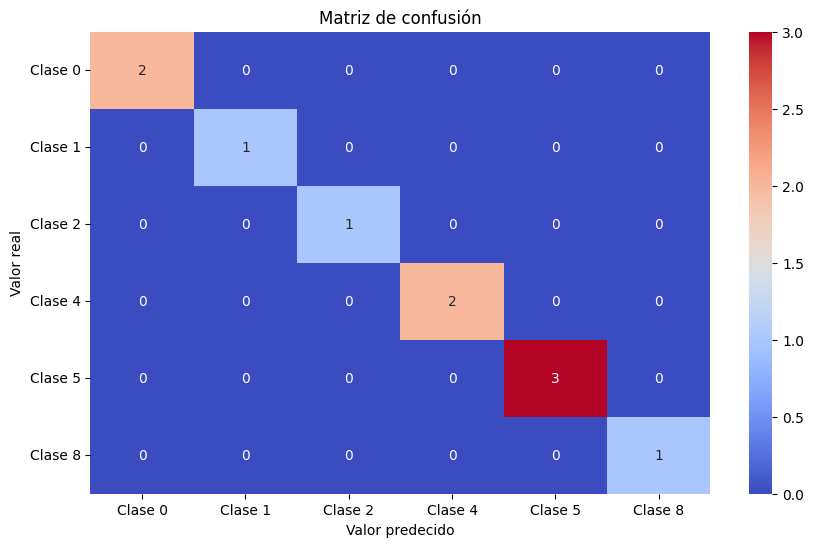


La precision del modelo es: 1.0



In [25]:
#Se genera la matriz de confusion para comprobar su precision

Cf_1 = confusion_matrix(list(y_p), Resultado)
Precision_1 = accuracy_score(y_p, Resultado)

class_labels = sorted(set(y_p))  # Asegurarse de que las etiquetas de clase están ordenadas
list_class = []

for label in class_labels: # Este for se utiliza para generar la lista de etiquetas y que correspondan a las clases que se estan comparando
    list_class.append(f"Clase {label}")


#Graficamos el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(Cf_1, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=list_class, yticklabels=list_class)
plt.yticks(rotation=0)
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_1}\n")

Ya terminando podemos decir que el modelo es bastante preciso, teniendo un 100% de certeza a la hora de probar con las 10 entradas.

In [ ]:
# Supongamos que 'modelo' es tu modelo Keras ya entrenado
model1.save('modelo.h5')  # Guarda el modelo en un archivo llamado 'modelo.h5'

# Para cargar el modelo más tarde
modelo_cargado = load_model('modelo.h5')